### Child marriage data first look
Turns out, this data is hyper-refined and difficult to work with.

In [1]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 9))
np.set_printoptions(precision=4, suppress=True)
import pyreadstat # this reads in the spss file
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Load wm.sav
This returns a pandas dataframe and a file with metadata from spss. It's confusing because some of the boolean (true/valse) variables come in as numeric data types (0.0 and 1.0), and other categorical variables read as object data types. 

In [2]:
# apply_value_formats is by default False, so you have to set it to True manually if you want the labels
# formats_as_category is by default True, and it means the replaced values will be transformed to a pandas category column.
# df2, meta = pyreadstat.read_sav("wm.sav", apply_value_formats=False, formats_as_category=True)

In [3]:
df2, meta2 = pyreadstat.read_sav('wm.sav')

In [4]:
df2.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CDEAD,welevel,religion,wmweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1.0,1.0,2.0,1.0,1.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,1.0,1.0,0.468799,-0.588731,2.0,-1.038469,1.0,NaN,NaN
1,1.0,2.0,2.0,1.0,2.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,2.0,1.0,0.468799,1.525888,5.0,0.474476,3.0,NaN,NaN
2,1.0,3.0,2.0,1.0,3.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,5.0,1.0,0.468799,-0.104456,3.0,-0.691985,2.0,NaN,NaN
3,1.0,4.0,2.0,1.0,4.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,1.0,1.0,0.468799,-1.203440,1.0,-1.478274,1.0,NaN,NaN
4,1.0,4.0,3.0,1.0,4.0,3.0,117.0,14.0,2.0,2013.0,...,0.0,2.0,1.0,0.468799,-1.203440,1.0,-1.478274,1.0,NaN,NaN


In [5]:
# save column labels for reference later
col_labels = meta2.column_labels

In [6]:
# replace the column names with column labels
# df2.columns = meta2.column_labels
# to go back to column names
# df2.columns = meta2.column_names

In [7]:
df2.head()
# print(meta2.colum_names)
# print(meta2.column_labels)
# print(meta2.number_rows)
# print(meta2.number_columns)
# print(meta2.file_label)
# print(meta2.file_encoding)
# there are other metadata pieces extracted. See the documentation for more details.

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CDEAD,welevel,religion,wmweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1.0,1.0,2.0,1.0,1.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,1.0,1.0,0.468799,-0.588731,2.0,-1.038469,1.0,NaN,NaN
1,1.0,2.0,2.0,1.0,2.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,2.0,1.0,0.468799,1.525888,5.0,0.474476,3.0,NaN,NaN
2,1.0,3.0,2.0,1.0,3.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,5.0,1.0,0.468799,-0.104456,3.0,-0.691985,2.0,NaN,NaN
3,1.0,4.0,2.0,1.0,4.0,2.0,117.0,14.0,2.0,2013.0,...,0.0,1.0,1.0,0.468799,-1.203440,1.0,-1.478274,1.0,NaN,NaN
4,1.0,4.0,3.0,1.0,4.0,3.0,117.0,14.0,2.0,2013.0,...,0.0,2.0,1.0,0.468799,-1.203440,1.0,-1.478274,1.0,NaN,NaN


In [8]:
print(meta2.file_encoding)

UTF-8


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Columns: 235 entries, HH1 to windex5r
dtypes: float64(160), object(75)
memory usage: 106.9+ MB


#### Categorical (object) variables

In [10]:
df2.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 75 columns):
CM13     59599 non-null object
MN2A     59599 non-null object
MN2B     59599 non-null object
MN2C     59599 non-null object
MN2F     59599 non-null object
MN2G     59599 non-null object
MN2X     59599 non-null object
MN17A    59599 non-null object
MN17B    59599 non-null object
MN17C    59599 non-null object
MN17F    59599 non-null object
MN17G    59599 non-null object
MN17H    59599 non-null object
MN17X    59599 non-null object
MN17Y    59599 non-null object
MN27A    59599 non-null object
MN27B    59599 non-null object
MN27C    59599 non-null object
MN27D    59599 non-null object
MN27E    59599 non-null object
MN27F    59599 non-null object
MN27G    59599 non-null object
MN27H    59599 non-null object
MN27I    59599 non-null object
MN27X    59599 non-null object
PN13A    59599 non-null object
PN13B    59599 non-null object
PN13C    59599 non-null object
PN13F    59599 non-null

#### Missing data
Code below calculates the percent of NaN data in each variable, but unfortunately it's not counting all the empty cells in variables of type object. See below. Apparently NaN only registers in numeric variables.

In [11]:
# percent missing NaN
(df2.shape[0]-df2.count())/59599

HH1         0.000000
HH2         0.000000
LN          0.000000
WM1         0.000000
WM2         0.000000
WM4         0.000000
WM5         0.000000
WM6D        0.000000
WM6M        0.000000
WM6Y        0.000000
              ...   
CDEAD       0.131009
welevel     0.131009
religion    0.000000
wmweight    0.000000
wscore      0.000000
windex5     0.000000
wscoreu     0.718804
windex5u    0.718804
wscorer     0.150187
windex5r    0.150187
Length: 235, dtype: float64

In [12]:
np.count_nonzero(df2['welevel'].isnull())/59599

0.13100890954546218

#### Example numeric var
NaNs are counted here.

In [13]:
df2['CDEAD'].value_counts(dropna=False)

 0.0     44457
NaN       7808
 1.0      5387
 2.0      1342
 3.0       419
 4.0       114
 5.0        39
 6.0        17
 7.0         9
 8.0         3
 10.0        2
 9.0         2
Name: CDEAD, dtype: int64

#### Example object var
NaNs are blank or empty.

In [14]:
# Antenatal care: Doctor
df2['MN2A'].value_counts(dropna=False)

     55609
A     3988
?        2
Name: MN2A, dtype: int64

In [15]:
# get a colunm index value
df2.columns.get_loc('MN2A')

67

In [16]:
df2.iloc[:,67].value_counts(dropna=False)

     55609
A     3988
?        2
Name: MN2A, dtype: int64

In [17]:
# access multiple columns
df2.iloc[:, 67:73].head()

,MN2A,MN2B,MN2C,MN2F,MN2G,MN2X
0,,,,,,
1,,,,,,
2,,,,,,
3,,,,,,
4,,,,,,


### Name, label reference

In [18]:
# df of var names and labels for future reference
var_defs = pd.DataFrame(meta2.column_names, meta2.column_labels)
var_defs.reset_index(inplace=True)
var_defs.columns = ['Name', 'Label']

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(var_defs)

                                                  Name     Label
0                                       Cluster number       HH1
1                                     Household number       HH2
2                                          Line number        LN
3                                       Cluster number       WM1
4                                     Household number       WM2
5                                  Woman's line number       WM4
6                                   Interviewer number       WM5
7                                     Day of interview      WM6D
8                                   Month of interview      WM6M
9                                    Year of interview      WM6Y
10                         Result of woman's interview       WM7
11                                        Field editor       WM8
12                                    Data entry clerk       WM9
13                           Start of interview - Hour     WM10H
14                       

### Variables spread across multiple columns
Another example: Information about some variables, like Antenatal Care, are spread across several columns. The type of caregiver before childbirth can be A, G, B, C, ? or F. 

In [20]:
# melt Antenatal Care into one colum and count frequency of each.
test_long = pd.melt(df2.iloc[:, 67:72],
                    var_name='Antenatal care',
                    value_name='Caregiver')

In [21]:
test_long['Caregiver'].value_counts(dropna=False)

     292533
A      3988
G       718
B       677
C        48
F        21
?        10
Name: Caregiver, dtype: int64

#### Second example: Assistance at delivery

In [22]:
# get column start index
df2.columns.get_loc('MN17A')

83

In [23]:
# check results
df2.iloc[:, 83:91].head(2)

,MN17A,MN17B,MN17C,MN17F,MN17G,MN17H,MN17X,MN17Y
0,,,,,,,,
1,,,,,,,,


### Combinations 
When multiple providers are present at delivery, there are combinations -- 63 different cases for Assistance at Delivery.

In [24]:
# concatenate values from multiple provider type columns
col_cat = df2.iloc[:,83].str.cat(df2.iloc[:,84:91])

In [25]:
col_cat.value_counts(dropna=False)

         51733
H         2354
F         1237
AB         922
A          654
FH         606
B          418
C          354
ABH        204
CH         180
         ...  
BHX          1
AFGH         1
ABCG         1
ABCF         1
ABFH         1
ACFX         1
BX           1
ACGH         1
ABCFG        1
ABFX         1
Name: MN17A, Length: 63, dtype: int64

### Grouping: Assistance at delivery
Add a new category to the df so we can group on it and do counts.

#### Provider codes
Doctor	A  
Nurse / Midwife	B  
Auxiliary midwife C  
Traditional birth attendant	F  
Community health worker	G  
Relative / Friend H  
Other (specify)	X  
No one Y  


In [26]:
df2['Assistance at delivery'] = df2.iloc[:,83].str.cat(df2.iloc[:,84:91])

In [27]:
df2['Assistance at delivery'].value_counts()

         51733
H         2354
F         1237
AB         922
A          654
FH         606
B          418
C          354
ABH        204
CH         180
         ...  
BHX          1
AFGH         1
ABCG         1
ABCF         1
ABFH         1
ACFX         1
BX           1
ACGH         1
ABCFG        1
ABFX         1
Name: Assistance at delivery, Length: 63, dtype: int64

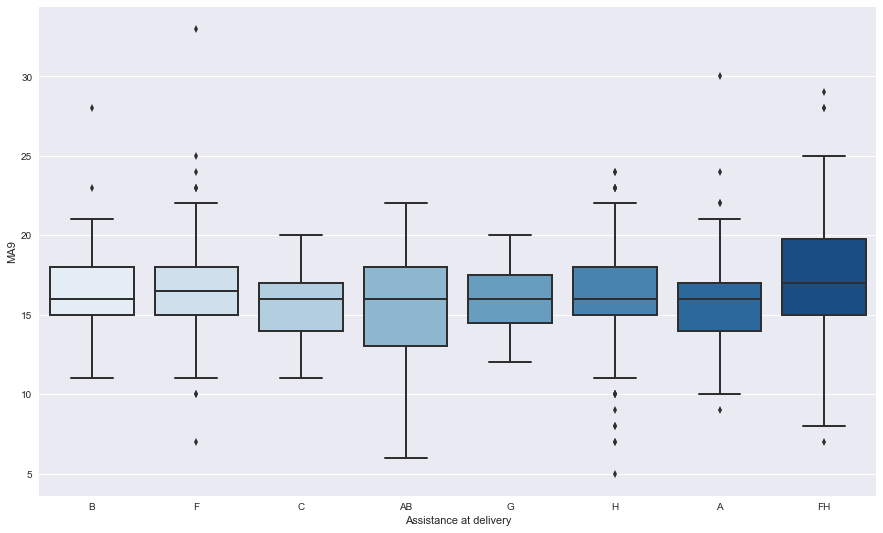

In [28]:
# library & dataset
# Use a color palette
providers = ['A','H', 'F','B', 'C', 'G', 'AB', 'FH']
sns.boxplot(x=df2['Assistance at delivery'][df2['Assistance at delivery'].isin(providers)],
            y=df2['MA9'][df2["MA9"] < 50], palette="Blues", linewidth=2)

sns.plt.show()

### Child mortality

In [29]:
# total living children
df2['Children_living'] = df2['CM4'] + df2['CM6']

In [30]:
# total children who died
df2['Children_dead'] = df2['CM9A'] + df2['CM9B']

In [31]:
# most have 3 living children
df2['Children_living'].value_counts()

3.0    31267
2.0     8779
4.0      245
Name: Children_living, dtype: int64

In [32]:
# most who who lost a child lost one child; some lost four or more
df2['Children_dead'].value_counts()

1.0     5387
2.0     1342
3.0      419
4.0      114
5.0       39
6.0       17
7.0        9
8.0        3
10.0       2
9.0        2
Name: Children_dead, dtype: int64

### Age at marriage/relationship

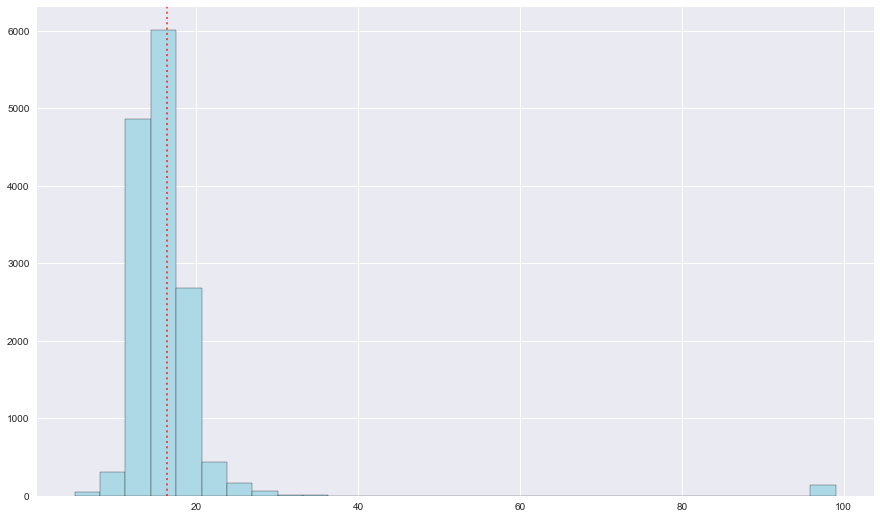

In [33]:
# women age at first marriage
# kde = stats.gaussian_kde(df2['MA9'])
df2['MA9'].hist(bins=30, color='lightblue', ec='k')
plt.axvline(df2['MA9'].mean(), color='red',
             linestyle='dotted', linewidth=2,
             alpha=0.65)
plt.show()

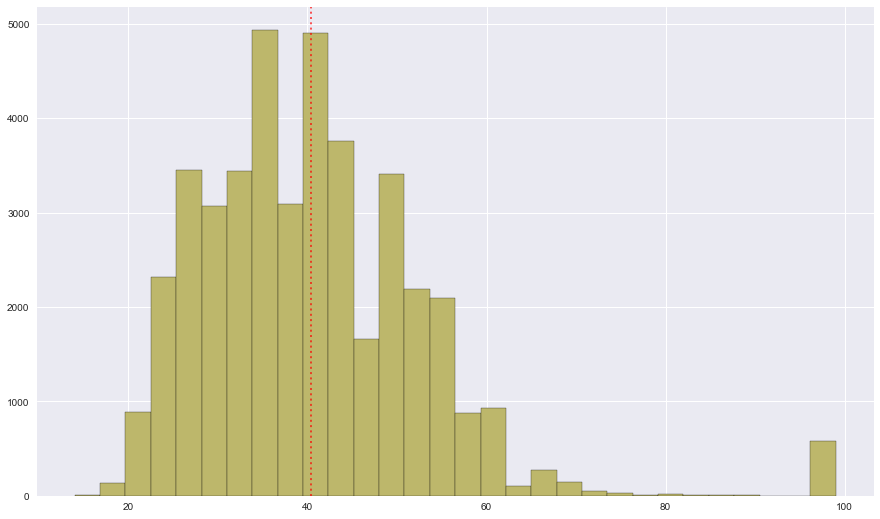

In [34]:
# husband/partner age at women's first marriage
# women age at first marriage
df2['MA2'].hist(bins=30, color='darkkhaki', ec='k')
plt.axvline(df2['MA2'].mean(), color='red',
            linestyle='dotted', linewidth=2,
            alpha=0.65)
plt.show()

In [35]:
df2['Assistance at delivery'].value_counts()

         51733
H         2354
F         1237
AB         922
A          654
FH         606
B          418
C          354
ABH        204
CH         180
         ...  
BHX          1
AFGH         1
ABCG         1
ABCF         1
ABFH         1
ACFX         1
BX           1
ACGH         1
ABCFG        1
ABFX         1
Name: Assistance at delivery, Length: 63, dtype: int64

### Post-natal care

In [36]:
# find an index
pd.Index(meta2.column_names).get_loc('PN10')

120

In [37]:
# as above, combine the variables from all post-natal columns
df2['Post-Natal Health'] = df2.iloc[:,124].str.cat(df2.iloc[:,125:130])

In [38]:
# mean child deaths grouped by post-natal caregiver combinations
df2.groupby('Post-Natal Health')['CDEAD'].mean().sort_values(ascending=False)

Post-Natal Health
AGH       2.000000
ABC       1.000000
AF        1.000000
BG        0.500000
FH        0.391304
CH        0.208333
FG        0.200000
          0.199026
AB        0.187500
CG        0.166667
            ...   
BC        0.000000
BCG       0.000000
AG        0.000000
BH        0.000000
AC        0.000000
ABG       0.000000
ABFH      0.000000
CF        0.000000
CFH       0.000000
??????    0.000000
Name: CDEAD, Length: 28, dtype: float64

In [39]:
# a count; most times a doctor involved
df2.groupby('Post-Natal Health')['CDEAD'].count()

Post-Natal Health
          50501
??????       12
A           546
AB           80
ABC           1
ABFH          1
ABG           3
ABH           8
AC            8
AF            1
          ...  
C            51
CF            2
CFH           1
CG            6
CH           24
F           147
FG            5
FH           23
G           206
H            74
Name: CDEAD, Length: 28, dtype: int64

In [40]:
# doctor present child survives
df2.groupby('Post-Natal Health')['CM10'].sum().sort_values(ascending=False)

Post-Natal Health
        109481.0
A          987.0
G          451.0
F          323.0
H          170.0
AB         143.0
B          128.0
C          103.0
CH          62.0
FH          53.0
          ...   
ABG          6.0
CF           5.0
ABC          5.0
AF           5.0
AGH          4.0
BC           3.0
CFH          2.0
BCG          2.0
ABFH         1.0
BH           1.0
Name: CM10, Length: 28, dtype: float64

### Descriptive stats

In [41]:
# result of interview; 51791 completed, 7263 not home
df2['WM7'].value_counts()

1.0     51791
2.0      7263
96.0      295
5.0       181
3.0        62
4.0         7
Name: WM7, dtype: int64

In [42]:
# ever gave birth, 1=Yes
df2['CM1'].value_counts()

1.0    40291
2.0     4032
Name: CM1, dtype: int64

In [43]:
# at least one child born alive later died
df2['CM8'].value_counts()

2.0    36989
1.0     7334
Name: CM8, dtype: int64

In [44]:
# boy later died; none=00
df2['CM9A'].value_counts()

1.0    3764
0.0    2761
2.0     625
3.0     141
4.0      27
5.0      13
6.0       2
8.0       1
Name: CM9A, dtype: int64

In [45]:
# total boys dead
df2['CM9A'].sum()

5630.0

In [46]:
# girl later died
df2['CM9B'].value_counts()

0.0    3503
1.0    3235
2.0     485
3.0      90
4.0      14
5.0       4
8.0       2
9.0       1
Name: CM9B, dtype: int64

In [47]:
# total girls died
df2['CM9B'].sum()

4576.0

### Scratch from here

In [48]:
# grouping values for single variable
df2.iloc[:,124].groupby(df2.iloc[:,124]).count()

PN13A
     58922
?       12
A      665
Name: PN13A, dtype: int64

In [49]:
# what are the values?
df2.iloc[:,124].unique()

array(['', 'A', '?'], dtype=object)

In [50]:
# grouping by doctor present, children ever born
df2.groupby('PN13A')['CM10'].sum()

PN13A
     110824.0
?        25.0
A      1204.0
Name: CM10, dtype: float64

In [51]:
# group on doctor present, children dead
df2.groupby('PN13A')['CDEAD'].sum()

PN13A
     10130.0
?        0.0
A       76.0
Name: CDEAD, dtype: float64

In [52]:
df2.groupby(['PN13A']).describe()

CDEAD                                                    CEB  \
         count      mean       std  min  25%  50%  75%   max    count   
PN13A                                                                   
       51114.0  0.198184  0.573487  0.0  0.0  0.0  0.0  10.0  51114.0   
?         12.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0     12.0   
A        665.0  0.114286  0.398254  0.0  0.0  0.0  0.0   4.0    665.0   

                   ...      wscorer            wscoreu                      \
           mean    ...          75%       max    count      mean       std   
PN13A              ...                                                       
       2.167938    ...     0.352580  5.419687  16580.0  0.039610  0.722950   
?      2.083333    ...     2.013836  3.130632      5.0  0.705703  1.329465   
A      1.810526    ...     1.357541  5.245946    174.0  0.706220  1.005922   

                                                         
            min       25%       50%       75%       max  
PN13A                                                    
      -1.933732 -0.152228  0.000000  0.031009  3.021174  
?     -0.588748 -0.422899  0.407018  1.661957  2.471186  
A     -1.208672 -0.054916  0.740708  1.526123  2.767395  

[3 rows x 1296 columns]